# TASK 1 : Import Libraries

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 39.95 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir="/content/datasets/Data"
#set the path to the train dir
train_dir=os.path.join(main_dir,"train")
#set the path to the test dir
test_dir=os.path.join(main_dir,"test")

#directory with the training covid images
train_covid_dir=os.path.join(train_dir,"COVID19")

#directory with the training normal images
train_normal_dir=os.path.join(train_dir,"NORMAL")

#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,"COVID19")

#directory with the testing normal images
test_normal_dir=os.path.join(test_dir,"NORMAL")

In [ ]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(501).jpg', 'COVID19(394).jpg', 'COVID19(212).jpg', 'COVID19(68).jpg', 'COVID-19 (6).jpg', 'COVID19(203).jpg', 'COVID19(434).jpg', 'COVID19(238).jpg', 'COVID19(474).jpg', 'COVID19(524).jpg']
['NORMAL(948).jpg', 'NORMAL(1157).jpg', 'NORMAL(741).jpg', 'NORMAL(562).jpg', 'NORMAL(1529).jpg', 'NORMAL(365).jpg', 'NORMAL(999).jpg', 'NORMAL(1099).jpg', 'NORMAL(1343).jpg', 'NORMAL(268).jpg']
['COVID19(379).jpg', 'COVID-19 (709).jpg', 'COVID-19 (461).jpg', 'COVID19(472).jpg', 'COVID19(350).jpg', 'COVID19(396).jpg', 'COVID-19 (822).jpg', 'COVID19(324).jpg', 'COVID19(512).jpg', 'COVID19(337).jpg']
['NORMAL(86).jpg', 'NORMAL(637).jpg', 'NORMAL(922).jpg', 'NORMAL(293).jpg', 'NORMAL(618).jpg', 'NORMAL(314).jpg', 'NORMAL(825).jpg', 'NORMAL(143).jpg', 'NORMAL(435).jpg', 'NORMAL(48).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set :",len(train_covid_names+train_normal_names))
print("Total images present in the test set :",len(test_covid_names+test_normal_names))

Total images present in the training set : 1811
Total images present in the test set : 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(501).jpg', '/content/datasets/Data/train/COVID19/COVID19(394).jpg', '/content/datasets/Data/train/COVID19/COVID19(212).jpg', '/content/datasets/Data/train/COVID19/COVID19(68).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (6).jpg', '/content/datasets/Data/train/COVID19/COVID19(203).jpg', '/content/datasets/Data/train/COVID19/COVID19(434).jpg', '/content/datasets/Data/train/COVID19/COVID19(238).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(948).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1157).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(741).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(562).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1529).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(365).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(999).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1099).jpg']


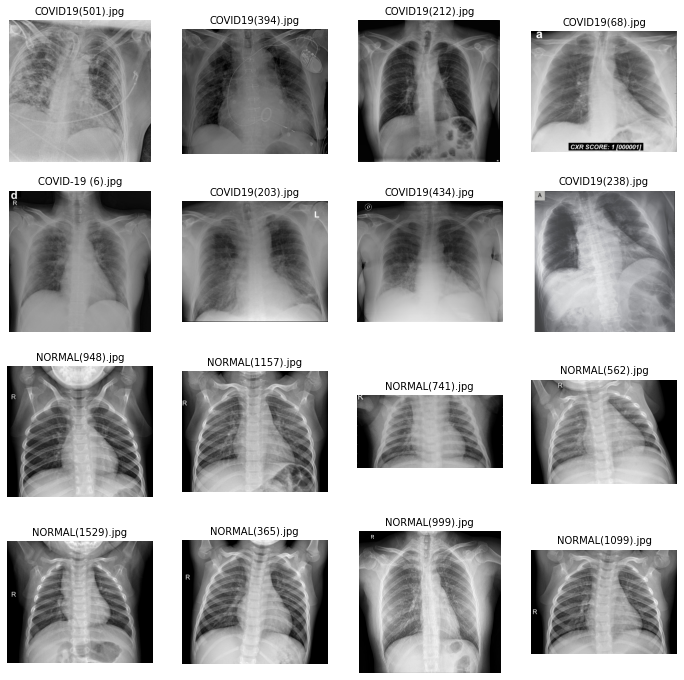

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pics = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pics = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

#print the list
print(covid_pics)
print(normal_pics)

#merge the covid and normal list
merged_list = covid_pics + normal_pics
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize= 10)
  plt.imshow(img, cmap='gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale= 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding = 'SAME',activation = 'relu',input_shape = (150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding = 'SAME',activation = 'relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr = 0.001), loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 58s 1s/step - loss: 1.7143 - accuracy: 0.6922 - val_loss: 0.3757 - val_accuracy: 0.8564
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.3006 - accuracy: 0.8689 - val_loss: 0.3075 - val_accuracy: 0.8923
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.2211 - accuracy: 0.9193 - val_loss: 0.1540 - val_accuracy: 0.9475
Epoch 4/30
46/46 [==============================] - 47s 1s/step - loss: 0.1918 - accuracy: 0.9310 - val_loss: 0.2122 - val_accuracy: 0.9337
Epoch 5/30
46/46 [==============================] - 47s 1s/step - loss: 0.1536 - accuracy: 0.9455 - val_loss: 0.1481 - val_accuracy: 0.9530
Epoch 6/30
46/46 [==============================] - 48s 1s/step - loss: 0.1520 - accuracy: 0.9489 - val_loss: 0.1790 - val_accuracy: 0.9392
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1495 - accuracy: 0.9510 - val_loss: 0.1510 - val_accuracy: 0.9558
Epoch 8/30
46/46 [==

In [ ]:
model.save('covid.h5')

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

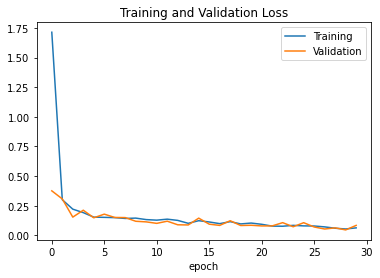

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [ ]:
model.metrics_names

['loss', 'accuracy']

Text(0.5, 0, 'epoch')

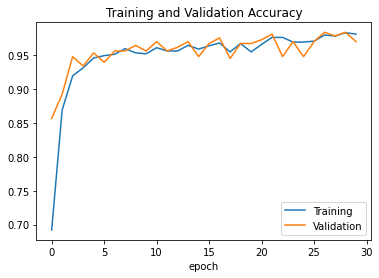

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss = model.evaluate(test_generator)
print('test_loss : {}'.format(test_loss))

16/16 [==============================] - 10s 637ms/step - loss: 0.0937 - accuracy: 0.9711
test_loss : [0.09365101158618927, 0.9710744023323059]


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = tensorflow.keras.utils.load_img(img_path,target_size=(150,150))
  images = tensorflow.keras.utils.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0 :
    print('covid detected')
  else:
    print('Your report is normal')

Saving 4496488.fig.003a.jpg to 4496488.fig.003a.jpg
1/1 [==============================] - 0s 16ms/step
4496488.fig.003a.jpg
covid detected


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gevent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.0 MB 15.3 MB/s 
     |████████████████████████████████| 254 kB 70.9 MB/s 


In [ ]:
!python app.py

2022-11-09 19:34:52.058493: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-11-09 19:34:52.440422: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89718784 exceeds 10% of free system memory.
2022-11-09 19:34:52.486630: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 89718784 exceeds 10% of free system memory.
<IPython.core.display.HTML object>
Traceback (most recent call last):
  File "app.py", line 32, in <module>
    uploaded = files.upload()
  File "/usr/local/lib/python3.7/dist-packages/google/colab/files.py", line 67, in upload
    uploaded_files = _upload_files(multiple=True)
  File "/usr/local/lib/python3.7/dist-packages/google/colab/files.py", line 146, in _upload_files
    input_id=input_id, output_id=output_id))
  File "/usr/local/lib/python3.7/dist-packages/google/colab/output/_js.py", line 36